In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
#
import tqdm
#
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symbol = "kbank.bk"
period = "10y"
#
ticker = yf.Ticker(symbol)

In [3]:
history = ticker.history(period = period, auto_adjust = False)
df = history.copy()
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-11-25,122.0,122.0,118.5,119.5,95.954689,6551400,0.0,0
2010-11-26,118.0,118.5,115.0,116.0,93.144302,5919100,0.0,0


#### ***Python TA library***
[TA Library](https://github.com/bukosabino/ta)

In [4]:
import ta

In [5]:
df["RSI"] = ta.momentum.rsi(df["Close"])

<AxesSubplot:xlabel='Date'>

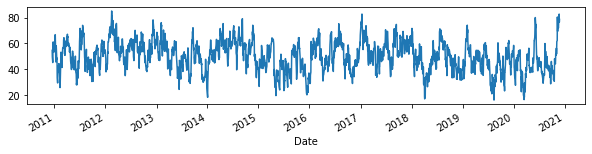

In [6]:
df["RSI"].plot(figsize = (10, 2))

In [7]:
margin = 10

In [8]:
print(margin)
df['Close average 75W'] = df['Close'].rolling(525, min_periods=1).mean()
df['Close average 40W'] = df['Close'].rolling(280, min_periods=1).mean()
df['Close average 75W+'] = df['Close average 75W']*(1+(margin/100))
df['Close average 75W-'] = df['Close average 75W']*(1-(margin/100))
#Changing the column in which we need the difference to % change
df.drop("Adj Close", axis = 1, inplace = True)
df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].pct_change().fillna(0)

10


<AxesSubplot:xlabel='Date'>

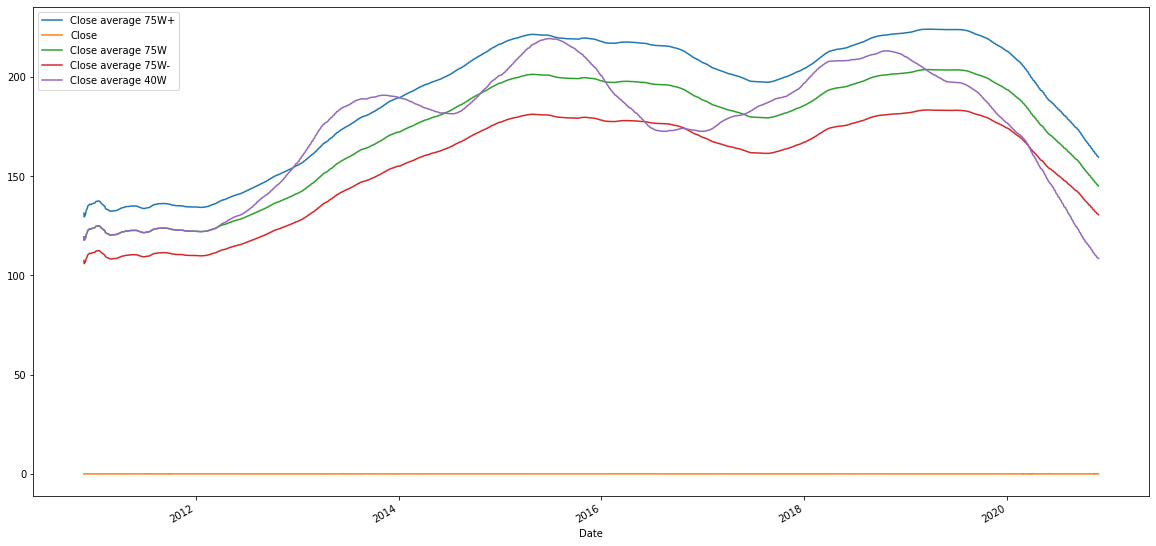

In [9]:
df[['Close average 75W+','Close','Close average 75W', 'Close average 75W-', 'Close average 40W']].plot(figsize=(20,10))

In [11]:
for i in range(0, len(df)):
    if df['Close average 75W+'].iloc[i] > df[]

2442

#### ***Strats article***
*source: https://www.cmcmarkets.com/en/trading-guides/trading-strategies*

### ***News-Based Strategy (Held Off)*** 
*source: https://arxiv.org/abs/1807.06824*